In [1]:
# dependancies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import orchest
import pickle

In [ ]:
# get data from data integrity
data = orchest.get_inputs()
df = data['fixed-df']

In [2]:
df = pd.read_csv('C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\fixed_dataset.csv')

In [3]:
df.tail()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
666,886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
667,888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
668,889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
669,890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
670,891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  671 non-null    int64 
 1   name        671 non-null    object
 2   company     671 non-null    object
 3   year        671 non-null    int64 
 4   Price       671 non-null    object
 5   kms_driven  671 non-null    object
 6   fuel_type   668 non-null    object
dtypes: int64(2), object(5)
memory usage: 36.8+ KB


In [5]:
df.size

4697

In [6]:
df.shape

(671, 7)

In [7]:
# Pandas profiling
from pandas_profiling import ProfileReport

In [9]:
data_profile = ProfileReport(df, explorative = True)
data_profile.to_file("Pandas_data_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Anaconda\envs\machine-learning-env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class #Instantiate the AutoViz class
AV = AutoViz_Class()

In [ ]:
filename = 'C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\fixed_dataset.csv'
dft = AV.AutoViz(filename)

In [ ]:
# sweet viz eda


In [8]:
df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
1,3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
2,4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
3,5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
4,13,Mahindra Scorpio SLE BS IV,Mahindra,2015,"3,20,000","48,660 kms",Diesel


C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_13100\4228945241.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


<AxesSubplot: xlabel='year', ylabel='Density'>

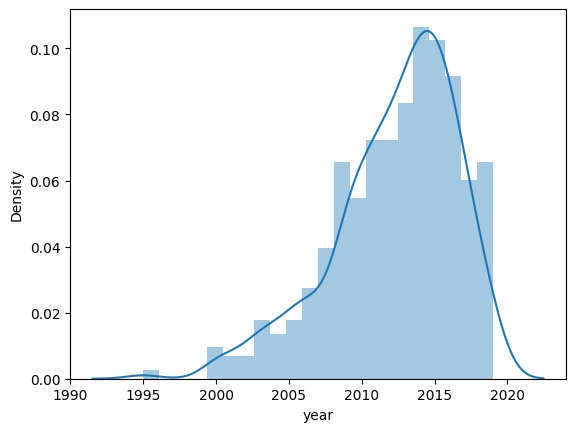

In [9]:
# check distributions
sns.distplot(df['year'])

In [10]:
df.columns

Index(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'],
      dtype='object')

<AxesSubplot: >

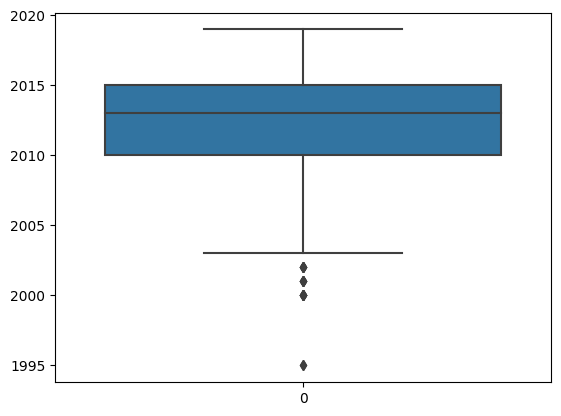

In [11]:
#check for outliers
# checking the box plot for outliers
sns.boxplot(df['year'])

In [12]:
# drop the unmamed column
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)

In [13]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [14]:
# fix the kms driven, remove the last two rows
df.drop([669,670], inplace=True)

In [15]:
df[df['kms_driven']=='Petrol']

,name,company,year,Price,kms_driven,fuel_type


In [16]:
df['Mileage'] = df['kms_driven'].str.split(' ').str[0]

In [17]:
df['Mileage']

0        22,000
1        28,000
2        36,000
3        59,000
4        48,660
         ...   
664      50,000
665      30,000
666    1,32,000
667      27,000
668      40,000
Name: Mileage, Length: 669, dtype: object

In [18]:
df.drop(columns='kms_driven',axis=1, inplace=True)

In [19]:
df.columns

Index(['name', 'company', 'year', 'Price', 'fuel_type', 'Mileage'], dtype='object')

In [20]:
df.head(2)

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,"22,000"
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,"28,000"


In [24]:
# remove the Ask For Price value in Price
df[df['Price']=='Ask For Price']

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,"22,000"
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,Diesel,"59,000"
67,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,Petrol,"28,028"
162,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,Diesel,"52,000"
168,Tata Indica eV2 LS,Tata,2017,Ask For Price,Diesel,"84,000"
233,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,Petrol,"24,000"
284,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,Ask For Price,Petrol,"16,000"
327,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,Diesel,"1,80,000"
335,Hyundai Xcent S 1.2,Hyundai,2015,Ask For Price,Petrol,"35,000"
348,Toyota Innova 2.0 V,Toyota,2009,Ask For Price,Diesel,"15,574"


In [26]:
# save the correct dataframe
df.to_csv('C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\eda_dataset.csv')

In [ ]:
#send data to EDA
orchest.output((df),name='eda-df')